In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

# Test function

In [2]:
import project1; import importlib; importlib.reload(project1); from project1.project1 import make_design_matrix
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
X = make_design_matrix(xvec, p=3)

In [3]:
from itertools import combinations_with_replacement
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
xi = {"x%i"%i : xvec[i].ravel() for i in range(len(xvec))}
keys = [key for key in xi.keys()]
comb = []
p = 2
for p in range(1,p+1):
    comb += [x for x in combinations_with_replacement(keys, p )]
print(comb)
X = make_design_matrix(xvec, p=2)
print(X)

[('x0',), ('x1',), ('x0', 'x0'), ('x0', 'x1'), ('x1', 'x1')]
[[1.     0.     0.     0.     0.     0.    ]
 [1.     0.25   0.     0.0625 0.     0.    ]
 [1.     0.5    0.     0.25   0.     0.    ]
 [1.     0.75   0.     0.5625 0.     0.    ]
 [1.     1.     0.     1.     0.     0.    ]
 [1.     0.     0.25   0.     0.     0.0625]
 [1.     0.25   0.25   0.0625 0.0625 0.0625]
 [1.     0.5    0.25   0.25   0.125  0.0625]
 [1.     0.75   0.25   0.5625 0.1875 0.0625]
 [1.     1.     0.25   1.     0.25   0.0625]
 [1.     0.     0.5    0.     0.     0.25  ]
 [1.     0.25   0.5    0.0625 0.125  0.25  ]
 [1.     0.5    0.5    0.25   0.25   0.25  ]
 [1.     0.75   0.5    0.5625 0.375  0.25  ]
 [1.     1.     0.5    1.     0.5    0.25  ]
 [1.     0.     0.75   0.     0.     0.5625]
 [1.     0.25   0.75   0.0625 0.1875 0.5625]
 [1.     0.5    0.75   0.25   0.375  0.5625]
 [1.     0.75   0.75   0.5625 0.5625 0.5625]
 [1.     1.     0.75   1.     0.75   0.5625]
 [1.     0.     1.     0.     0.     1.

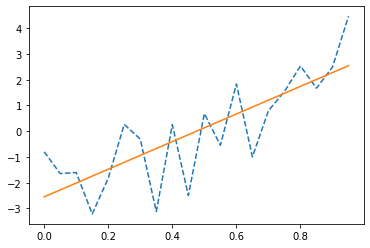

In [4]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
def test_func(**kwargs):
    x = kwargs['x0']
    return 5*x**2 + x

xvec  = np.array([x])
X = make_design_matrix(xvec = xvec, p = 1)
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = np.array([[x] for x in znoisy - np.mean(znoisy)])
A = np.linalg.pinv(X.T@X)@X.T
betahat = A@znoisy_centered
znoisy_tilde = X@betahat
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)

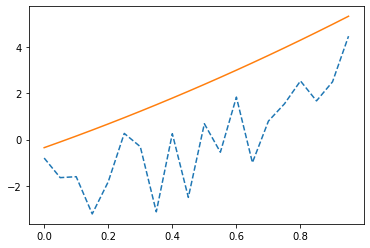

In [5]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
xvec = np.array([x])
z = test_func(**{'x0':x})
znoisy_tilde, X,  znoisy_centered, znoisy = ols_fp(xvec = xvec, f = test_func, p=2)
znoisy = z + noise
znoisy_centered = znoisy-np.mean(znoisy)
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)


In [15]:
%matplotlib qt
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x, y = np.arange(0,1,0.1), np.arange(0,1,0.1)
x, y = np.meshgrid(x,y)
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return 5*x**2 + x + 5*y**2 + y
xvec = np.array([x, y])
z = test_func(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
print(x.shape)
znoisy_tilde, X,  znoisy_centered, znoisy = ols_fp(xvec = xvec, f = test_func_2, p=2)
znoisy_tilde = znoisy_tilde.reshape(x.shape)
znoisy = znoisy.reshape(x.shape)
print(znoisy_tilde.shape)
znoisy_centered = znoisy-np.mean(znoisy)


fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.viridis)
ax.plot_surface(x,y,znoisy, cmap=cm.coolwarm)

(10, 10)
(10, 10)


# b)

In [7]:
%matplotlib qt
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
print(x.shape)
znoisy_tilde, X, znoisy_centered, znoisy = ols_fp(xvec = xvec, f = FrankeFunction, p=5, sigma = 0.1)
znoisy_tilde = znoisy_tilde.reshape(x.shape)
znoisy = znoisy.reshape(x.shape)
print(znoisy_tilde.shape)
znoisy_centered = znoisy_centered.reshape(x.shape)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.viridis)
#ax.plot_surface(x,y,z, cmap=cm.coolwarm)
ax.plot_surface(x,y,znoisy, cmap=cm.coolwarm)

(100, 100)
(100, 100)


In [8]:
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
xvec = np.array([x,y])

mses = np.zeros((5))
Rs = np.zeros((5))
betas = []
for p in range(1,6):
    znoisy_tilde, X, znoisy_centered, znoisy, betahat = ols_fp(xvec = xvec, f = FrankeFunction, p=p, sigma=0.1, return_betas=True)
    mses[p-1] = MSE(y = znoisy,ytilde = znoisy_tilde+ np.mean(z))
    Rs[p-1] = Rscore(y = znoisy, ytilde = znoisy_tilde+ np.mean(z))
    betas.append(betahat)

fig, axs = plt.subplots(1,2)
axs[0].plot(mses)
axs[0].set_ylabel("MSE")
axs[1].plot(Rs)
axs[1].set_ylabel("$R^2$ score")
[ax.set_xlabel("Polynomial degree $p$") for ax in axs]
fig.tight_layout()

In [9]:
beta_matrix = np.ones((5, len(betas[-1])))
for i in range(5):
    for j in range(len(betas[i])):
        beta_matrix[i,j] = betas[i][j]
[plt.plot(beta_matrix[:,i], label="$\\beta%i$"%i) for i in range(beta_matrix.shape[-1])]
plt.ylabel("$\\beta$")
plt.xlabel("Polynomial degree $p$")
plt.legend(bbox_to_anchor=(1,.5,.1,1.1))

# c)

To plot surface data retrieve the indices from the uniqueness of the xy-coordinates.

In [10]:
%matplotlib qt
from sklearn.model_selection import train_test_split
x, y = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X = make_design_matrix(xvec = xvec, p = 5)
z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,.1,size=z.shape)
znoisy = z + noise
ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                          **{"test_size" : 0.25, 
                                                                                             "random_state" : 42})
xtrain = Xtrain[:,1]
ytrain = Xtrain[:,2]
shape_train = (x.shape[0], len(ytrain)//x.shape[0])
xtest = Xtest[:,1]
ytest = Xtest[:,2]
shape_test = (x.shape[0], len(ytest)//x.shape[0])

fig, axs = plt.subplots(1,2,subplot_kw={'projection':'3d'}, figsize=(10,10))
axs[0].scatter(xtrain, ytrain, ztilde_train, c=ztilde_train, cmap=cm.viridis)
axs[0].scatter(xtrain, ytrain, ztrain, c=ztrain, cmap=cm.coolwarm)
axs[1].scatter(xtest, ytest, ztilde_test, c=ztilde_test, cmap=cm.viridis)
axs[1].scatter(xtest, ytest, ztest, c=ztest, cmap=cm.coolwarm)

# Bias-variance trade-off test function

In [11]:
model_complexity = 10
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = test_func_2(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,.1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.25, 
                                                                                                "random_state" : 42})
    mses_train[p-1] = MSE(y = ztrain,ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain, ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test)
    

Text(0.5, 0, 'Polynomial degree')

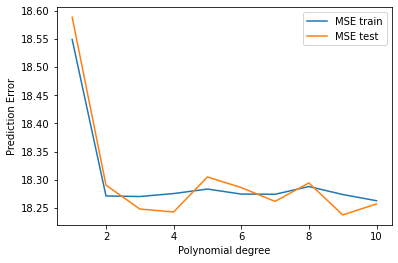

In [12]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, mses_train, label="MSE train")
plt.plot(ps, mses_test, label="MSE test")
plt.legend()
plt.ylabel("Prediction Error")
plt.xlabel("Polynomial degree")

# Bias-variance trade-off Franke function

In [13]:
model_complexity = 20
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
    noise = np.random.normal(0,.1,size=z.shape)
    znoisy = z + noise
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.25, 
                                                                                                "random_state" : 42})
    mses_train[p-1] = MSE(y = ztrain,ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain, ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test)
    

Text(0.5, 0, 'Polynomial degree')

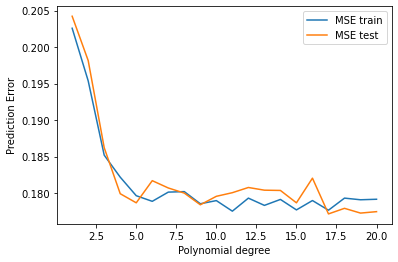

In [14]:
%matplotlib inline
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, mses_train, label="MSE train")
plt.plot(ps, mses_test, label="MSE test")
plt.legend()
plt.ylabel("Prediction Error")
plt.xlabel("Polynomial degree")